## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  52.883205  1291.853976  0.025226  9.403305   62.199625
1  22.348826   265.503263  0.674018  3.476845  180.488364
2  53.329326  1637.512639  0.139203  3.265271  234.244348
3  41.952457   560.893894  0.170541  8.784614  104.432927
4  51.384903   316.699722  0.669591  7.394883  218.188066


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0398087	total: 56.4ms	remaining: 56.3s
1:	learn: 1.0302251	total: 57.1ms	remaining: 28.5s
2:	learn: 1.0197064	total: 57.6ms	remaining: 19.1s
3:	learn: 1.0080781	total: 58.1ms	remaining: 14.5s
4:	learn: 0.9969602	total: 58.6ms	remaining: 11.7s
5:	learn: 0.9873070	total: 59ms	remaining: 9.78s
6:	learn: 0.9755733	total: 59.6ms	remaining: 8.45s
7:	learn: 0.9640617	total: 60.1ms	remaining: 7.45s
8:	learn: 0.9513822	total: 60.7ms	remaining: 6.68s
9:	learn: 0.9383075	total: 61.2ms	remaining: 6.05s
10:	learn: 0.9279967	total: 62.1ms	remaining: 5.58s
11:	learn: 0.9144316	total: 62.7ms	remaining: 5.16s
12:	learn: 0.9021534	total: 63.4ms	remaining: 4.82s
13:	learn: 0.8905109	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8804613	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8704525	total: 66.3ms	remaining: 4.08s
16:	learn: 0.8621539	total: 66.9ms	remaining: 3.87s
17:	learn: 0.8517968	total: 67.5ms	remaining: 3.68s
18:	learn: 0.8431875	total: 68.1ms	remaining: 

132:	learn: 0.2432058	total: 117ms	remaining: 762ms
133:	learn: 0.2415312	total: 117ms	remaining: 759ms
134:	learn: 0.2389174	total: 118ms	remaining: 756ms
135:	learn: 0.2366838	total: 118ms	remaining: 753ms
136:	learn: 0.2344357	total: 119ms	remaining: 749ms
137:	learn: 0.2325662	total: 119ms	remaining: 745ms
138:	learn: 0.2305718	total: 120ms	remaining: 742ms
139:	learn: 0.2280838	total: 120ms	remaining: 738ms
140:	learn: 0.2260812	total: 120ms	remaining: 734ms
141:	learn: 0.2234586	total: 121ms	remaining: 731ms
142:	learn: 0.2203363	total: 121ms	remaining: 727ms
143:	learn: 0.2188277	total: 122ms	remaining: 724ms
144:	learn: 0.2166791	total: 122ms	remaining: 721ms
145:	learn: 0.2147649	total: 122ms	remaining: 716ms
146:	learn: 0.2132731	total: 123ms	remaining: 712ms
147:	learn: 0.2112119	total: 123ms	remaining: 709ms
148:	learn: 0.2090682	total: 124ms	remaining: 706ms
149:	learn: 0.2066955	total: 124ms	remaining: 703ms
150:	learn: 0.2047250	total: 125ms	remaining: 701ms
151:	learn: 

292:	learn: 0.0724442	total: 185ms	remaining: 447ms
293:	learn: 0.0723163	total: 186ms	remaining: 446ms
294:	learn: 0.0721937	total: 186ms	remaining: 445ms
295:	learn: 0.0717686	total: 187ms	remaining: 444ms
296:	learn: 0.0713504	total: 187ms	remaining: 443ms
297:	learn: 0.0709973	total: 187ms	remaining: 442ms
298:	learn: 0.0708536	total: 188ms	remaining: 441ms
299:	learn: 0.0707411	total: 188ms	remaining: 439ms
300:	learn: 0.0701816	total: 189ms	remaining: 438ms
301:	learn: 0.0697849	total: 189ms	remaining: 437ms
302:	learn: 0.0694002	total: 190ms	remaining: 436ms
303:	learn: 0.0690409	total: 190ms	remaining: 435ms
304:	learn: 0.0689122	total: 190ms	remaining: 433ms
305:	learn: 0.0687722	total: 191ms	remaining: 432ms
306:	learn: 0.0683899	total: 191ms	remaining: 431ms
307:	learn: 0.0682494	total: 191ms	remaining: 430ms
308:	learn: 0.0677899	total: 192ms	remaining: 429ms
309:	learn: 0.0676558	total: 192ms	remaining: 427ms
310:	learn: 0.0673302	total: 192ms	remaining: 426ms
311:	learn: 

514:	learn: 0.0320590	total: 282ms	remaining: 266ms
515:	learn: 0.0319748	total: 283ms	remaining: 265ms
516:	learn: 0.0318353	total: 283ms	remaining: 265ms
517:	learn: 0.0317142	total: 284ms	remaining: 264ms
518:	learn: 0.0315910	total: 284ms	remaining: 263ms
519:	learn: 0.0314518	total: 285ms	remaining: 263ms
520:	learn: 0.0313464	total: 285ms	remaining: 262ms
521:	learn: 0.0312429	total: 285ms	remaining: 261ms
522:	learn: 0.0311325	total: 286ms	remaining: 261ms
523:	learn: 0.0310499	total: 286ms	remaining: 260ms
524:	learn: 0.0309686	total: 287ms	remaining: 259ms
525:	learn: 0.0308955	total: 287ms	remaining: 259ms
526:	learn: 0.0307674	total: 287ms	remaining: 258ms
527:	learn: 0.0306884	total: 288ms	remaining: 257ms
528:	learn: 0.0306107	total: 288ms	remaining: 257ms
529:	learn: 0.0305341	total: 289ms	remaining: 256ms
530:	learn: 0.0303446	total: 289ms	remaining: 255ms
531:	learn: 0.0302220	total: 289ms	remaining: 255ms
532:	learn: 0.0300365	total: 290ms	remaining: 254ms
533:	learn: 

673:	learn: 0.0168322	total: 351ms	remaining: 170ms
674:	learn: 0.0167442	total: 351ms	remaining: 169ms
675:	learn: 0.0166680	total: 352ms	remaining: 169ms
676:	learn: 0.0166099	total: 352ms	remaining: 168ms
677:	learn: 0.0165542	total: 353ms	remaining: 168ms
678:	learn: 0.0164673	total: 353ms	remaining: 167ms
679:	learn: 0.0164108	total: 354ms	remaining: 166ms
680:	learn: 0.0163214	total: 354ms	remaining: 166ms
681:	learn: 0.0162492	total: 355ms	remaining: 165ms
682:	learn: 0.0161667	total: 355ms	remaining: 165ms
683:	learn: 0.0160798	total: 355ms	remaining: 164ms
684:	learn: 0.0160253	total: 356ms	remaining: 164ms
685:	learn: 0.0159710	total: 356ms	remaining: 163ms
686:	learn: 0.0159243	total: 357ms	remaining: 162ms
687:	learn: 0.0158422	total: 357ms	remaining: 162ms
688:	learn: 0.0157696	total: 357ms	remaining: 161ms
689:	learn: 0.0156924	total: 358ms	remaining: 161ms
690:	learn: 0.0156370	total: 358ms	remaining: 160ms
691:	learn: 0.0155922	total: 358ms	remaining: 160ms
692:	learn: 

932:	learn: 0.0084862	total: 464ms	remaining: 33.3ms
933:	learn: 0.0084520	total: 464ms	remaining: 32.8ms
934:	learn: 0.0084469	total: 465ms	remaining: 32.3ms
935:	learn: 0.0084334	total: 465ms	remaining: 31.8ms
936:	learn: 0.0084203	total: 465ms	remaining: 31.3ms
937:	learn: 0.0084069	total: 466ms	remaining: 30.8ms
938:	learn: 0.0083644	total: 466ms	remaining: 30.3ms
939:	learn: 0.0083513	total: 467ms	remaining: 29.8ms
940:	learn: 0.0083113	total: 467ms	remaining: 29.3ms
941:	learn: 0.0082881	total: 468ms	remaining: 28.8ms
942:	learn: 0.0082688	total: 468ms	remaining: 28.3ms
943:	learn: 0.0082461	total: 469ms	remaining: 27.8ms
944:	learn: 0.0082337	total: 469ms	remaining: 27.3ms
945:	learn: 0.0082133	total: 469ms	remaining: 26.8ms
946:	learn: 0.0081934	total: 470ms	remaining: 26.3ms
947:	learn: 0.0081710	total: 470ms	remaining: 25.8ms
948:	learn: 0.0081516	total: 471ms	remaining: 25.3ms
949:	learn: 0.0081155	total: 471ms	remaining: 24.8ms
950:	learn: 0.0080966	total: 471ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


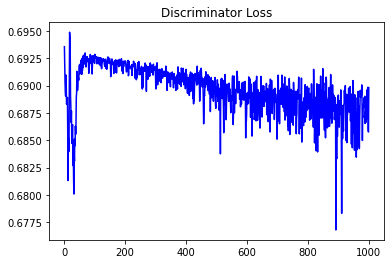

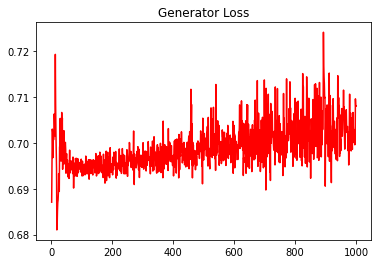

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.004519978294524116


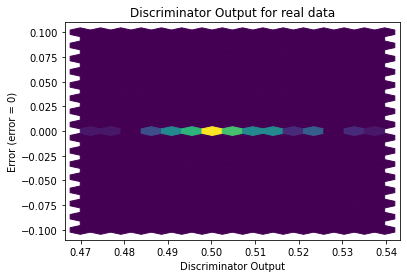

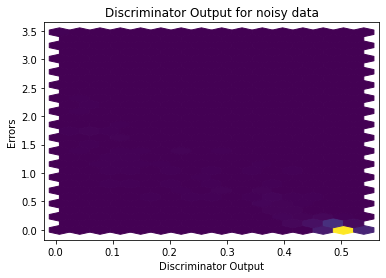

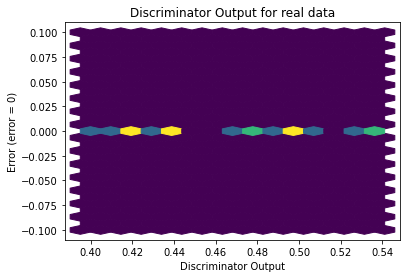

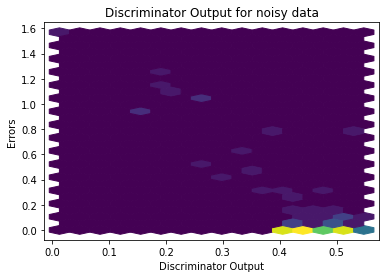

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1135]], requires_grad=True)
